Carga de librerias y data

In [3]:
# Librerias 
import pandas as pd

# visualización
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# modelo
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.linear_model import LogisticRegression

# warnings 
import warnings
warnings.filterwarnings("ignore")

In [4]:
# Cargar data 
df = pd.read_csv("./creditcard.csv")

Limpieza de datos 

In [5]:
# EDA
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
df.shape

(284807, 31)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [9]:
print(df.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [10]:
# Distribución de clases
class_counts = df["Class"].value_counts()
print("Class Distribution:")
print(class_counts)

Class Distribution:
Class
0    284315
1       492
Name: count, dtype: int64


In [11]:
df['Hour'] = (df['Time'] //  3600) % 24
df['Fraud_Spike'] = df['Class'].rolling(window=1000).mean() 
bins = [0, 50, 100, 200, 500, 1000, 5000, 10000, 50000] 
labels = ['0-50', '51-100', '101-200', '201-500', '501-1000', '1001-5000', '5001-10000', '10001+']
df['Amount Range'] = pd.cut(df['Amount'], bins=bins, labels=labels, right=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 34 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   Time          284807 non-null  float64 
 1   V1            284807 non-null  float64 
 2   V2            284807 non-null  float64 
 3   V3            284807 non-null  float64 
 4   V4            284807 non-null  float64 
 5   V5            284807 non-null  float64 
 6   V6            284807 non-null  float64 
 7   V7            284807 non-null  float64 
 8   V8            284807 non-null  float64 
 9   V9            284807 non-null  float64 
 10  V10           284807 non-null  float64 
 11  V11           284807 non-null  float64 
 12  V12           284807 non-null  float64 
 13  V13           284807 non-null  float64 
 14  V14           284807 non-null  float64 
 15  V15           284807 non-null  float64 
 16  V16           284807 non-null  float64 
 17  V17           284807 non-null

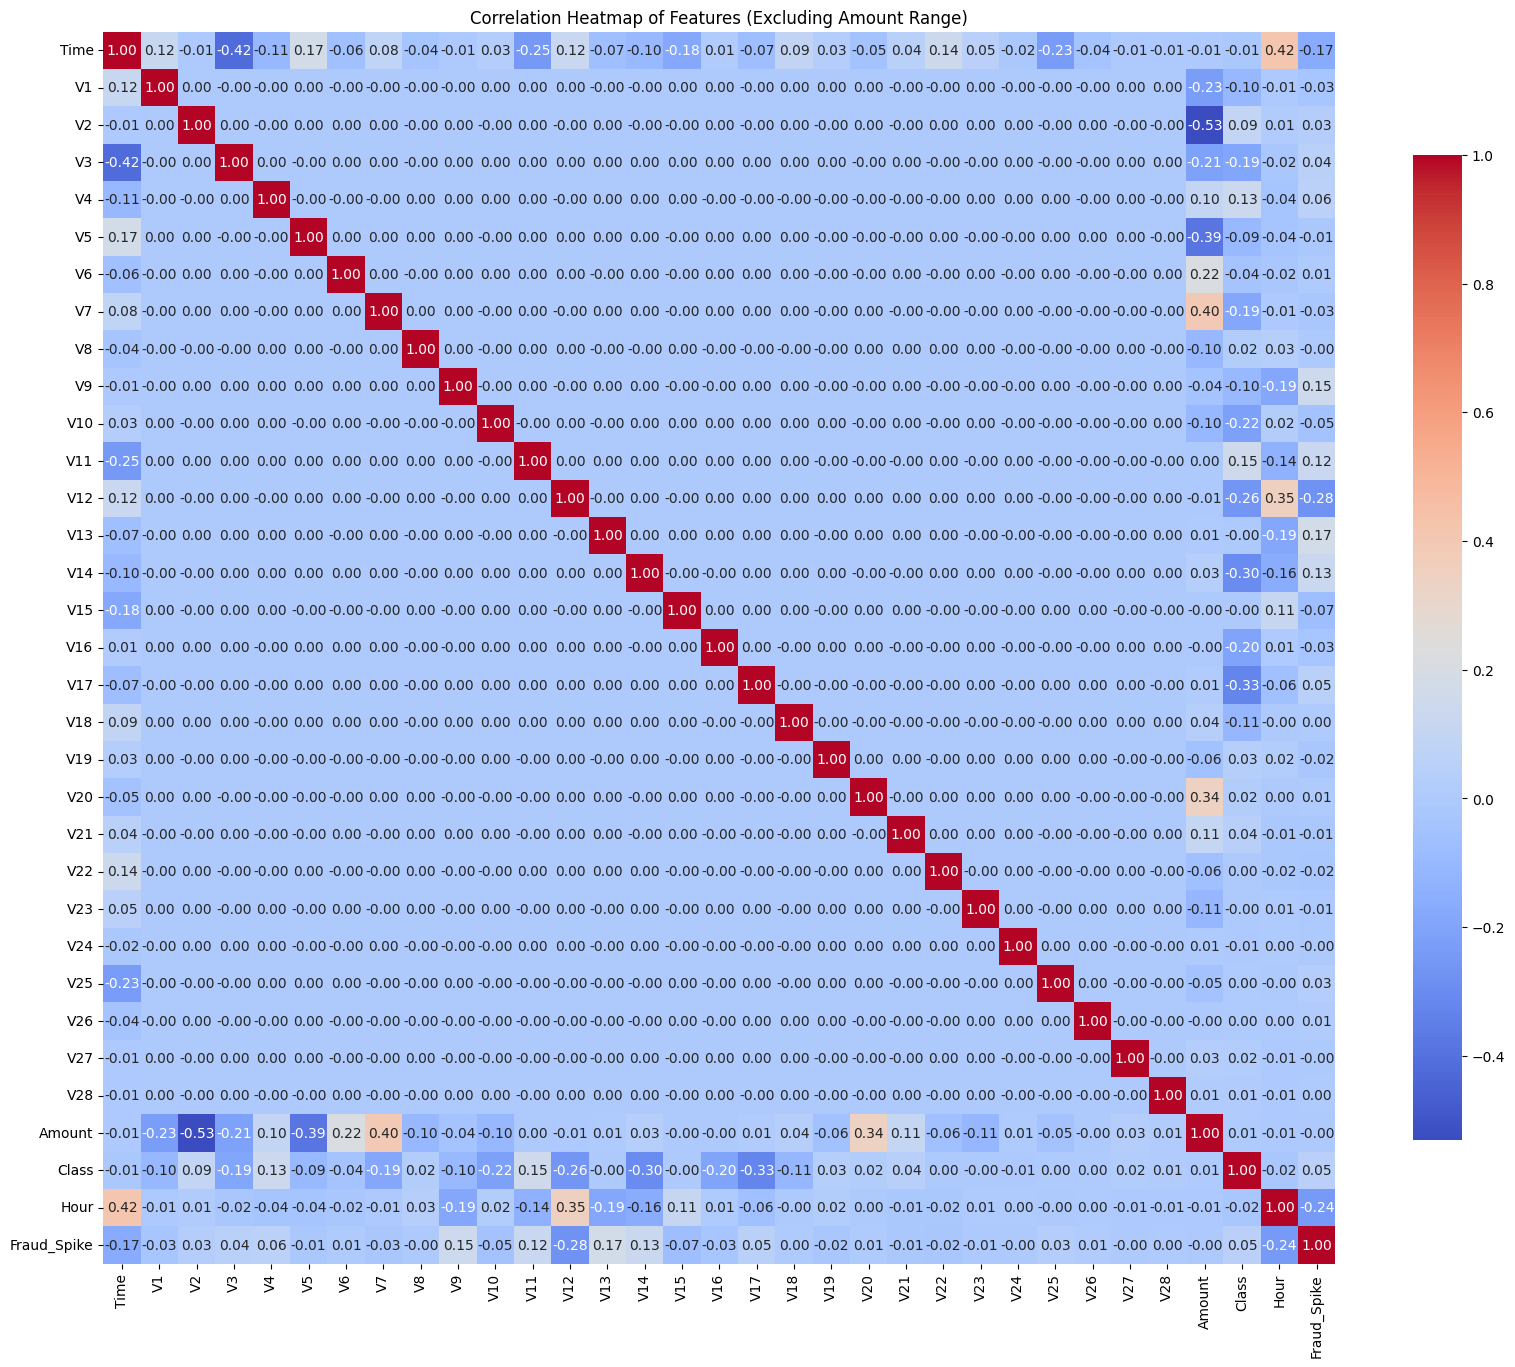

In [12]:
# Analisis de correlación 

corr_matrix = df.drop(columns=['Amount Range']).corr()

plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap of Features (Excluding Amount Range)')
plt.show()

In [13]:
# Balancear clases
df = df.sample(frac=1)

fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492]

norm_distributed_df = pd.concat([fraud_df, non_fraud_df])

new_df = norm_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V24,V25,V26,V27,V28,Amount,Class,Hour,Fraud_Spike,Amount Range
175966,122573.0,-1.028638,0.782364,1.691835,-0.192002,1.152512,-0.147057,0.832909,0.117255,-0.411373,...,0.496903,0.510054,-1.145247,0.031802,0.078104,9.90,0,10.0,0.000,0-50
157868,110547.0,-1.532810,2.232752,-5.923100,3.386708,-0.153443,-1.419748,-3.878576,1.444656,-1.465542,...,-0.359983,0.050678,1.095671,0.471741,-0.106667,0.76,1,6.0,0.004,0-50
272669,165209.0,1.987296,-0.525456,-2.680663,0.397902,0.714438,-0.543641,0.614390,-0.358673,-1.477304,...,0.281147,0.728619,-0.227102,-0.059643,-0.064336,112.14,0,21.0,0.001,101-200
76609,56650.0,-8.762083,2.791030,-7.682767,6.991214,-5.230695,-0.357388,-9.685621,1.749335,-4.495679,...,-0.415430,0.219665,0.330020,-0.028252,-0.156270,7.52,1,15.0,0.002,0-50
42784,41243.0,-10.940739,6.261586,-14.182339,7.183602,-9.951363,-3.860820,-13.547302,7.096472,-6.294029,...,0.454368,-0.101611,0.446997,0.062293,-0.439770,45.49,1,11.0,0.016,0-50


In [14]:
new_df = new_df.dropna()

for column in new_df.columns:
    if new_df[column].dtype == 'object':
        new_df[column] = new_df[column].str.strip() 
        new_df[column] = new_df[column].replace({'0-50': 25, '51-100': 75}) 
        new_df[column] = pd.to_numeric(new_df[column], errors='coerce')

label_encoder = LabelEncoder()
for column in new_df.columns:
    if new_df[column].dtype == 'object' or new_df[column].apply(lambda x: isinstance(x, str)).any():
        new_df[column] = label_encoder.fit_transform(new_df[column].astype(str))

In [15]:
# MODELO DE CLASIFICACIÓN

new_df = new_df.dropna()

X = new_df.drop('Class', axis=1)
y = new_df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

# MODELO
classifier = LogisticRegression()

# ENTRENAMIENTO
classifier.fit(X_train, y_train)

# PARAMETROS
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

grid_log_reg = GridSearchCV(LogisticRegression(solver='liblinear'), log_reg_params, cv=5)
grid_log_reg.fit(X_train, y_train)

best_log_reg = grid_log_reg.best_estimator_

# ENTRENAMIENTO 2
best_log_reg.fit(X_train, y_train)

# PREDICCION
y_pred = best_log_reg.predict(X_test)

# PARAMETROS
print("Mejores parámetros:", grid_log_reg.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Mejores parámetros: {'C': 1, 'penalty': 'l1'}
Accuracy: 0.9489795918367347
Precision: 0.9736842105263158
Recall: 0.940677966101695
F1 Score: 0.9568965517241379
ROC AUC Score: 0.9511082138200784
Confusion Matrix:
 [[ 75   3]
 [  7 111]]


In [16]:
# Guardar parametros en variables 
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Mejores parámetros:", grid_log_reg.best_params_)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)
print("Confusion Matrix:\n", conf_matrix)


Mejores parámetros: {'C': 1, 'penalty': 'l1'}
Accuracy: 0.9489795918367347
Precision: 0.9736842105263158
Recall: 0.940677966101695
F1 Score: 0.9568965517241379
ROC AUC Score: 0.9511082138200784
Confusion Matrix:
 [[ 75   3]
 [  7 111]]


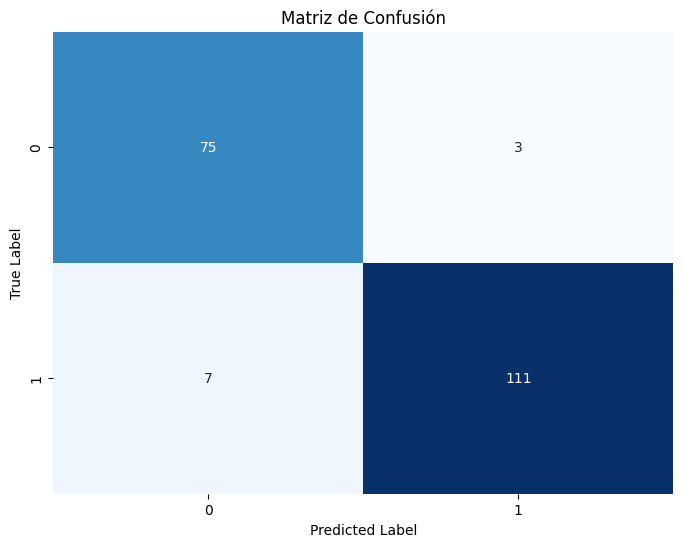

In [17]:
# Matriz de confusion grafica 
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Matriz de Confusión')
plt.show()
